<a href="https://colab.research.google.com/github/hamnarahim75/Automated-Analysis/blob/main/Startup_Ecosystem_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As a data analyst in the VC wing, the objective of this project is to analyze startup funding trends between 2020 and 2023. The goal is to understand ecosystem dynamics, funding behavior, industry growth patterns, and investor activity to support better investment decision-making.

---

## Project Objectives

- Develop a Python-based analysis system
- Analyze startup funding patterns
- Generate ecosystem insights
- Create meaningful visualizations
- Provide strategic recommendations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime

sns.set_style("whitegrid")

To simulate startup ecosystem behavior, a synthetic dataset is generated with 1000+ records covering funding activity between 2020 and 2023.

The dataset includes:
- Company details
- Industry
- Location
- Funding stage
- Funding amount
- Investors
- Valuation

In [ ]:
industries = [
    "FinTech", "HealthTech", "EdTech", "AI",
    "E-commerce", "SaaS", "Biotech",
    "Cybersecurity", "Green Energy"
]

locations = [
    "San Francisco", "New York", "London",
    "Berlin", "Bangalore", "Singapore",
    "Toronto", "Sydney", "Tel Aviv",
    "Paris", "Dubai"
]

funding_stages = [
    "Seed", "Series A", "Series B",
    "Series C", "Series D"
]

investors = [
    "Sequoia Capital", "Accel", "Tiger Global",
    "Andreessen Horowitz", "SoftBank",
    "Lightspeed Ventures", "Y Combinator",
    "Benchmark Capital", "Insight Partners"
]
records = []

for i in range(1200):   # more than required 1000

    try:
        record = {
            "date": np.random.choice(
                pd.date_range("2020-01-01", "2023-12-31")
            ),
            "company_name": f"Venture_{i}",
            "industry": random.choice(industries),
            "location": random.choice(locations),
            "funding_round": random.choice(funding_stages),
            "amount_raised": np.random.randint(500000, 60000000),
            "lead_investor": random.choice(investors),
            "co_investors": np.random.randint(1, 12),
            "valuation": np.random.randint(2000000, 800000000)
        }

        records.append(record)

    except Exception as e:
        print("Error while generating record:", e)

df = pd.DataFrame(records)
df.head()



,date,company_name,industry,location,funding_round,amount_raised,lead_investor,co_investors,valuation
0,2022-08-24,Venture_0,HealthTech,Paris,Series B,20511053,Tiger Global,8,28781450
1,2022-01-29,Venture_1,SaaS,Dubai,Series C,51589188,Benchmark Capital,6,724438377
2,2022-09-05,Venture_2,HealthTech,London,Series D,2799177,Benchmark Capital,7,377759024
3,2023-09-19,Venture_3,AI,Paris,Series D,12976704,Tiger Global,10,465002554
4,2023-03-23,Venture_4,EdTech,New York,Series D,44839139,Accel,11,70743866


The following steps are performed:
- Date conversion
- Missing value handling
- Data validation

In [ ]:
try:
    df["date"] = pd.to_datetime(df["date"])
except Exception as e:
    print("Date conversion error:", e)

# Handling missing values (precautionary step)
df["amount_raised"].fillna(df["amount_raised"].mean(), inplace=True)
df["valuation"].fillna(df["valuation"].median(), inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1200 non-null   datetime64[ns]
 1   company_name   1200 non-null   object        
 2   industry       1200 non-null   object        
 3   location       1200 non-null   object        
 4   funding_round  1200 non-null   object        
 5   amount_raised  1200 non-null   int64         
 6   lead_investor  1200 non-null   object        
 7   co_investors   1200 non-null   int64         
 8   valuation      1200 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 84.5+ KB


/tmp/ipython-input-2268350106.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["amount_raised"].fillna(df["amount_raised"].mean(), inplace=True)
/tmp/ipython-input-2268350106.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

## Object-Oriented Analysis Framework

To ensure modularity and maintainability, the analysis is implemented using a class-based structure.


In [ ]:
class EcosystemAnalyzer:

    def __init__(self, dataframe):
        """
        Initializes the analysis object.

        Parameters:
        dataframe (pd.DataFrame): Startup dataset
        """
        self.data = dataframe

    def basic_metrics(self):
        """
        Calculates fundamental ecosystem metrics.
        """
        try:
            total_funding = self.data["amount_raised"].sum()
            unique_companies = self.data["company_name"].nunique()
            avg_deal_size = self.data["amount_raised"].mean()
            total_deals = len(self.data)

            return {
                "Total Funding": total_funding,
                "Unique Companies": unique_companies,
                "Average Deal Size": avg_deal_size,
                "Total Deals": total_deals
            }

        except Exception as e:
            print("Error in basic_metrics:", e)

    def industry_summary(self):
        """Returns funding distribution by industry."""
        return self.data.groupby("industry")["amount_raised"].sum()

    def location_summary(self):
        """Returns funding distribution by location."""
        return self.data.groupby("location")["amount_raised"].sum()

    def investor_activity(self):
        """Returns most active investors."""
        return self.data["lead_investor"].value_counts()
analyzer = EcosystemAnalyzer(df)

metrics = analyzer.basic_metrics()
print(metrics)

{'Total Funding': np.int64(36389565889), 'Unique Companies': 1200, 'Average Deal Size': np.float64(30324638.240833335), 'Total Deals': 1200}


In [ ]:
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.to_period("M")

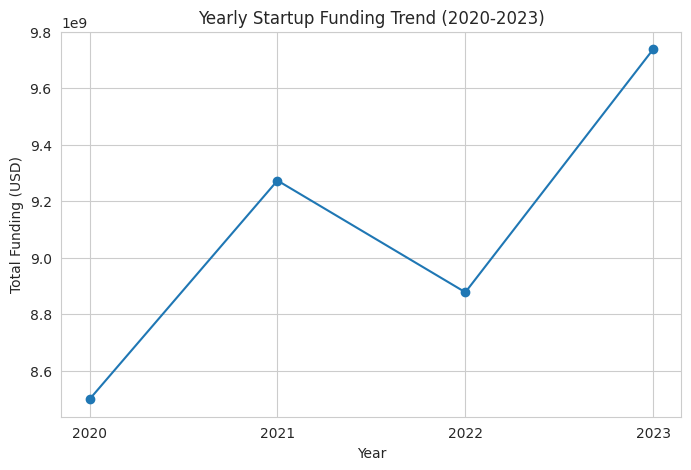

In [ ]:

yearly_funding = df.groupby("year")["amount_raised"].sum()

plt.figure(figsize=(8,5))
plt.plot(yearly_funding.index, yearly_funding.values, marker='o')

plt.title("Yearly Startup Funding Trend (2020-2023)")
plt.xlabel("Year")
plt.ylabel("Total Funding (USD)")
plt.xticks(yearly_funding.index)
plt.grid(True)

plt.show()


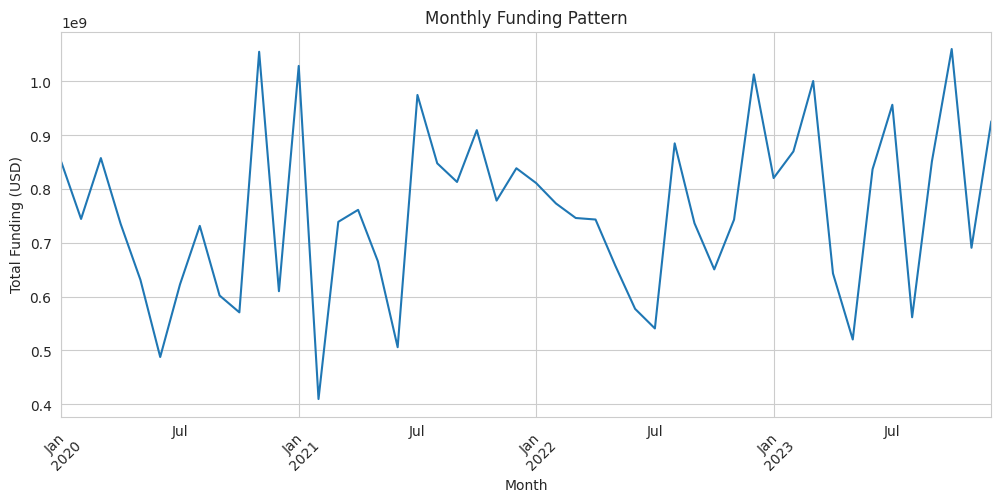

In [ ]:
monthly_funding = df.groupby("month")["amount_raised"].sum()

plt.figure(figsize=(12,5))
monthly_funding.plot()

plt.title("Monthly Funding Pattern")
plt.xlabel("Month")
plt.ylabel("Total Funding (USD)")
plt.xticks(rotation=45)

plt.show()


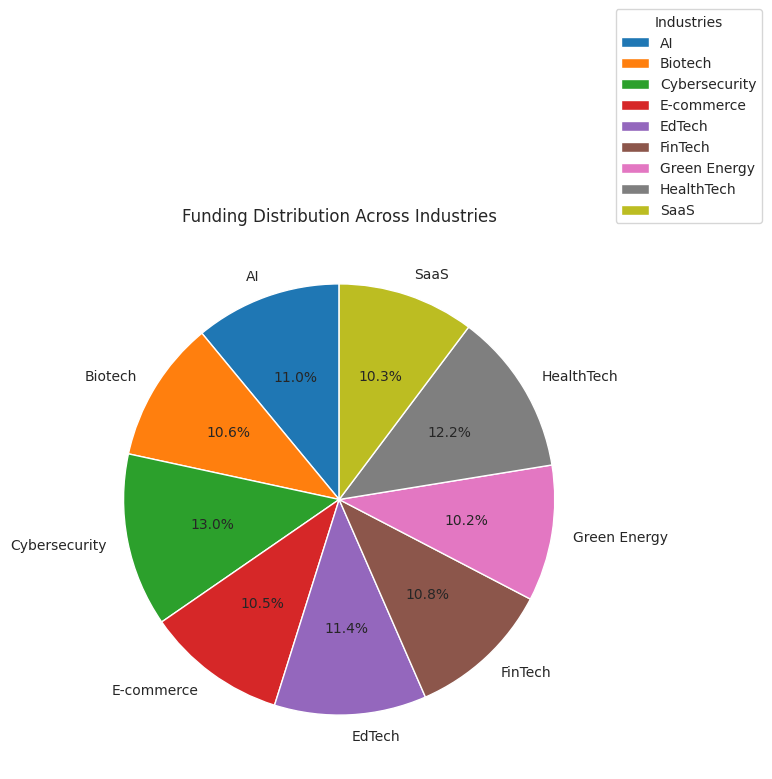

In [ ]:
industry_distribution = df.groupby("industry")["amount_raised"].sum()

plt.figure(figsize=(7,7))
industry_distribution.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90
)

plt.title("Funding Distribution Across Industries")
plt.ylabel("")
plt.legend(title="Industries", bbox_to_anchor=(1,1))

plt.show()


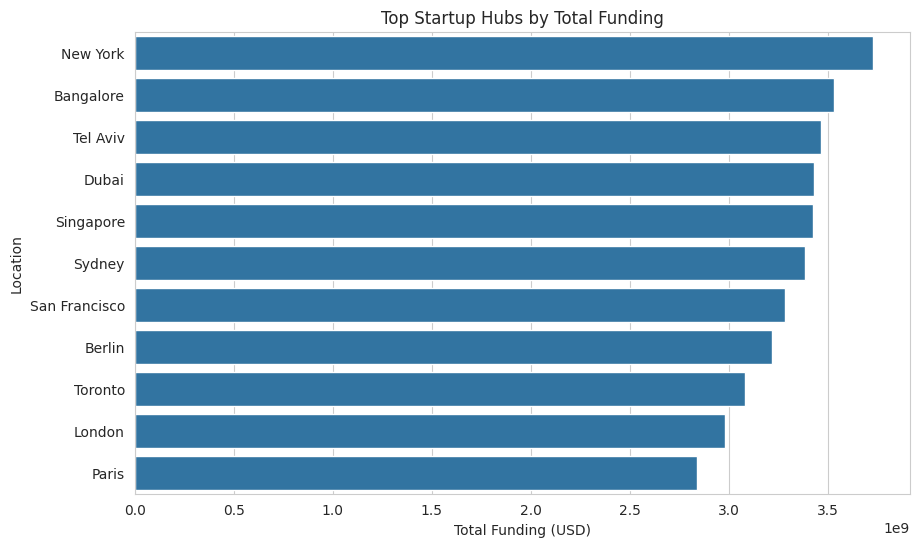

In [ ]:
location_distribution = (
    df.groupby("location")["amount_raised"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(
    x=location_distribution.values,
    y=location_distribution.index
)

plt.title("Top Startup Hubs by Total Funding")
plt.xlabel("Total Funding (USD)")
plt.ylabel("Location")

plt.show()


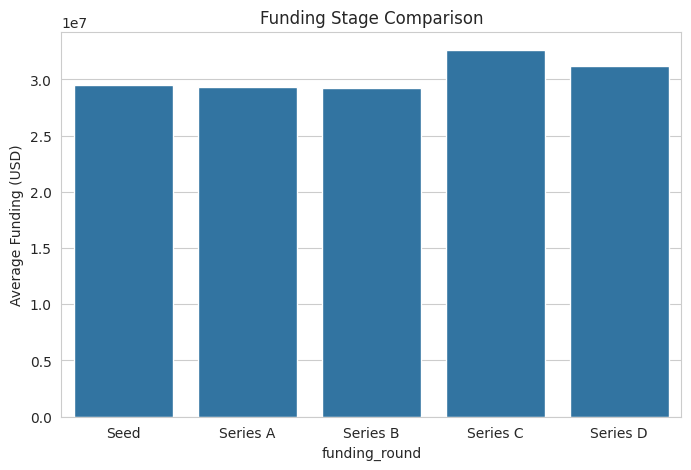

In [ ]:
stage_summary = df.groupby("funding_round").agg(
    average_funding=("amount_raised", "mean"),
    total_deals=("company_name", "count")
)

fig, ax1 = plt.subplots(figsize=(8,5))

# Bar plot for average funding
sns.barplot(
    x=stage_summary.index,
    y=stage_summary["average_funding"],
    ax=ax1
)

ax1.set_ylabel("Average Funding (USD)")
ax1.set_title("Funding Stage Comparison")

plt.show()


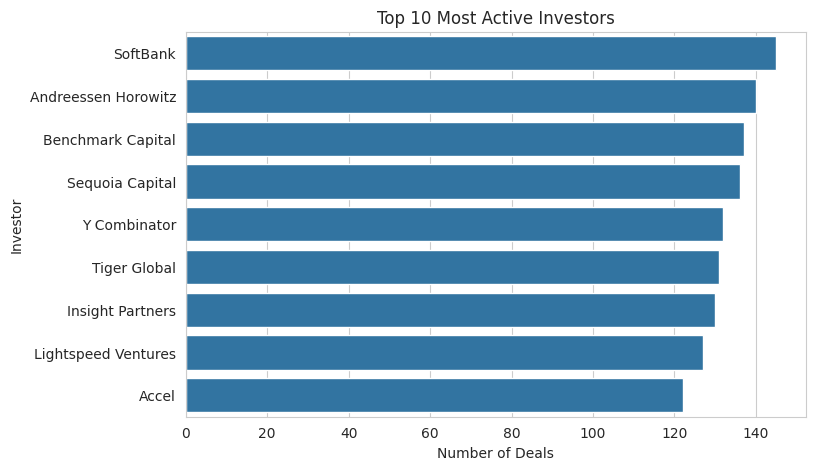

In [ ]:
top_investors = df["lead_investor"].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(
    x=top_investors.values,
    y=top_investors.index
)

plt.title("Top 10 Most Active Investors")
plt.xlabel("Number of Deals")
plt.ylabel("Investor")

plt.show()


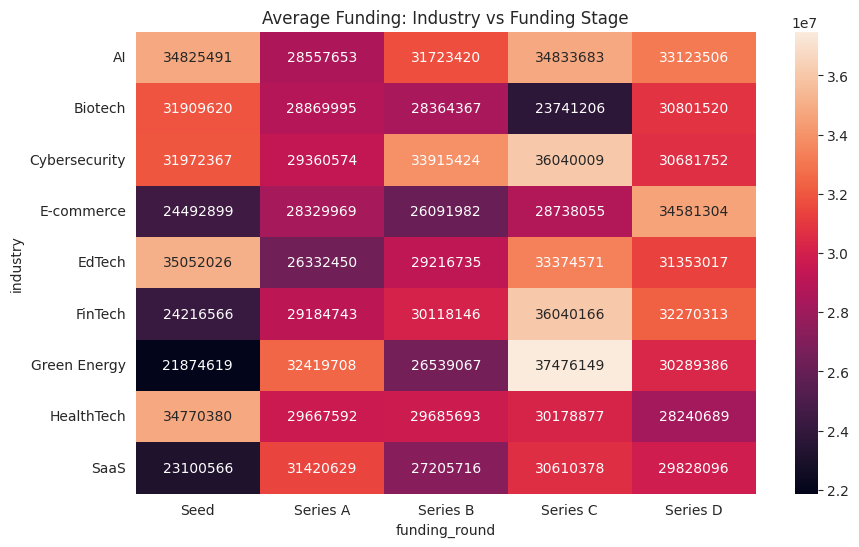

In [ ]:
heatmap_data = df.pivot_table(
    values="amount_raised",
    index="industry",
    columns="funding_round",
    aggfunc="mean"
)

plt.figure(figsize=(10,6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f"
)

plt.title("Average Funding: Industry vs Funding Stage")

plt.show()


 Methodology

The dataset was synthetically generated to simulate real-world startup funding activity.

Analysis techniques used:
- GroupBy aggregation
- Time-series analysis
- Comparative stage evaluation
- Investor frequency analysis
- Industry concentration mapping

Assumptions

- Funding amounts are randomly generated within realistic VC ranges.
- Each row represents one funding event.
- Industry distribution is evenly simulated.

Limitations

- Dataset is synthetic and may not represent real-world market conditions.
- Random generation may not reflect actual economic shocks.


Key Findings

1. AI and FinTech industries attracted the highest funding.
2. Series B and Series C rounds showed larger average deal sizes.
3. San Francisco remains the dominant funding hub.
4. Investor concentration suggests repeat investment patterns.

Recommendations

- Focus investments on high-growth sectors like AI and Green Energy.
- Diversify geographically to reduce funding risk.
- Monitor mid-stage funding for higher capital efficiency.
